In [6]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_new=pd.read_csv('train.csv')
df = df_new[0:233155]
df.tail(10)


,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
233144,613161,56059,69001,83.04,34,23024,86,1044,15-06-63,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
233145,606146,49803,66973,76.15,34,21081,45,1051,23-12-85,Self employed,...,0,0,1672,0,2,0,0yrs 9mon,2yrs 6mon,1,0
233146,622612,38439,52965,74.58,34,20700,48,1051,23-07-82,Self employed,...,0,0,0,0,2,0,0yrs 3mon,0yrs 3mon,0,0
233147,645697,72623,105405,69.73,34,20700,48,1051,19-06-89,Salaried,...,0,0,0,0,1,0,0yrs 9mon,1yrs 0mon,0,0
233148,613494,42894,60334,72.93,34,20700,48,1051,08-07-93,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
233149,626432,63213,105405,60.72,34,20700,48,1050,01-08-88,Salaried,...,0,0,4084,0,0,0,1yrs 9mon,3yrs 3mon,0,0
233150,606141,73651,100600,74.95,34,23775,51,990,05-12-88,Self employed,...,0,0,1565,0,0,0,0yrs 6mon,0yrs 6mon,0,0
233151,613658,33484,71212,48.45,77,22186,86,2299,01-06-76,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
233152,548084,34259,73286,49.10,77,22186,86,2299,26-03-94,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
233153,630213,75751,116009,66.81,77,22186,86,2299,18-02-84,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0


In [3]:
df.isna().sum()
#df.columns

UniqueID                                  0
disbursed_amount                          0
asset_cost                                0
ltv                                       0
branch_id                                 0
supplier_id                               0
manufacturer_id                           0
Current_pincode_ID                        0
Date.of.Birth                             0
Employment.Type                        7661
DisbursalDate                             0
State_ID                                  0
Employee_code_ID                          0
MobileNo_Avl_Flag                         0
Aadhar_flag                               0
PAN_flag                                  0
VoterID_flag                              0
Driving_flag                              0
Passport_flag                             0
PERFORM_CNS.SCORE                         0
PERFORM_CNS.SCORE.DESCRIPTION             0
PRI.NO.OF.ACCTS                           0
PRI.ACTIVE.ACCTS                

In [4]:
df.dtypes

UniqueID                                 int64
disbursed_amount                         int64
asset_cost                               int64
ltv                                    float64
branch_id                                int64
supplier_id                              int64
manufacturer_id                          int64
Current_pincode_ID                       int64
Date.of.Birth                           object
Employment.Type                         object
DisbursalDate                           object
State_ID                                 int64
Employee_code_ID                         int64
MobileNo_Avl_Flag                        int64
Aadhar_flag                              int64
PAN_flag                                 int64
VoterID_flag                             int64
Driving_flag                             int64
Passport_flag                            int64
PERFORM_CNS.SCORE                        int64
PERFORM_CNS.SCORE.DESCRIPTION           object
PRI.NO.OF.ACC

In [5]:
print(df["loan_default"].value_counts())
print(df["MobileNo_Avl_Flag"].value_counts())
print(df["Passport_flag"].value_counts())
print(df["Aadhar_flag"].value_counts())
print(df["branch_id"].value_counts())
print(df["Employment.Type"].value_counts())


0    182543
1     50611
Name: loan_default, dtype: int64
1    233154
Name: MobileNo_Avl_Flag, dtype: int64
0    232658
1       496
Name: Passport_flag, dtype: int64
1    195924
0     37230
Name: Aadhar_flag, dtype: int64
2      13138
67     11328
3       9230
5       9218
36      8832
       ...  
217      183
261      176
84       156
111       89
158       69
Name: branch_id, Length: 82, dtype: int64
Self employed    127635
Salaried          97858
Name: Employment.Type, dtype: int64


In [7]:
months = []
for i in df["AVERAGE.ACCT.AGE"]:
    data= i.split(" ")
    year=data[0]
    month=data[1]
    year=year.split("y")[0]
    month=month.split("m")[0]
    months.append(12*int(year)+ int(month))
df["AVERAGE.ACCT.AGE.MONTH"]= months

months=[]
for i in df["CREDIT.HISTORY.LENGTH"]:
    data= i.split(" ")
    year=data[0]
    month=data[1]
    year=year.split("y")[0]
    month=month.split("m")[0]
    months.append(12*int(year)+ int(month))

df["CREDIT.HISTORY.LENGTH.MONTH"]= months

/Users/ankit.chaubey/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/ankit.chaubey/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [8]:
import datetime
from datetime import date
DisbursalDateMonths =[]
age=[]
for i in df["DisbursalDate"]:
    datte= datetime.datetime.strptime(i,"%d-%m-%y")
    DisbursalDateMonths.append(datte.month)
new_col=pd.DataFrame(DisbursalDateMonths, columns=["DisbursalDateMonths"])
df["DisbursalDateMonths"]= DisbursalDateMonths
for i in df["Date.of.Birth"]:
    datte= datetime.datetime.strptime(i,"%d-%m-%y")
    date= date.today()
    age.append(abs(datte.year-date.year))
print(age[0:10])
df["age_of_coust"]= age
print(df.head)

/Users/ankit.chaubey/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


[35, 34, 34, 26, 42, 29, 31, 30, 28, 49]
<bound method NDFrame.head of         UniqueID  disbursed_amount  asset_cost    ltv  branch_id  supplier_id  \
0         420825             50578       58400  89.55         67        22807   
1         537409             47145       65550  73.23         67        22807   
2         417566             53278       61360  89.63         67        22807   
3         624493             57513       66113  88.48         67        22807   
4         539055             52378       60300  88.39         67        22807   
...          ...               ...         ...    ...        ...          ...   
233149    626432             63213      105405  60.72         34        20700   
233150    606141             73651      100600  74.95         34        23775   
233151    613658             33484       71212  48.45         77        22186   
233152    548084             34259       73286  49.10         77        22186   
233153    630213             75751    

/Users/ankit.chaubey/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


In [9]:
df1=df
df1["Employment.Type"].fillna(value="Salaried", inplace=True)
df1.isna().sum()

/Users/ankit.chaubey/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


UniqueID                               0
disbursed_amount                       0
asset_cost                             0
ltv                                    0
branch_id                              0
supplier_id                            0
manufacturer_id                        0
Current_pincode_ID                     0
Date.of.Birth                          0
Employment.Type                        0
DisbursalDate                          0
State_ID                               0
Employee_code_ID                       0
MobileNo_Avl_Flag                      0
Aadhar_flag                            0
PAN_flag                               0
VoterID_flag                           0
Driving_flag                           0
Passport_flag                          0
PERFORM_CNS.SCORE                      0
PERFORM_CNS.SCORE.DESCRIPTION          0
PRI.NO.OF.ACCTS                        0
PRI.ACTIVE.ACCTS                       0
PRI.OVERDUE.ACCTS                      0
PRI.CURRENT.BALA

In [10]:
df1["loan_default"].value_counts()


0    182543
1     50611
Name: loan_default, dtype: int64

In [11]:
df1=df.drop("Date.of.Birth", axis=1)
#df1=df1.drop("UniqueID",axis=1)
df1=df1.drop("MobileNo_Avl_Flag",axis=1)
df1=df1.drop("PERFORM_CNS.SCORE.DESCRIPTION",axis=1)
df1=df1.drop("DisbursalDate",axis=1)
df1=df1.drop("CREDIT.HISTORY.LENGTH",axis=1)
df1=df1.drop("AVERAGE.ACCT.AGE",axis=1)


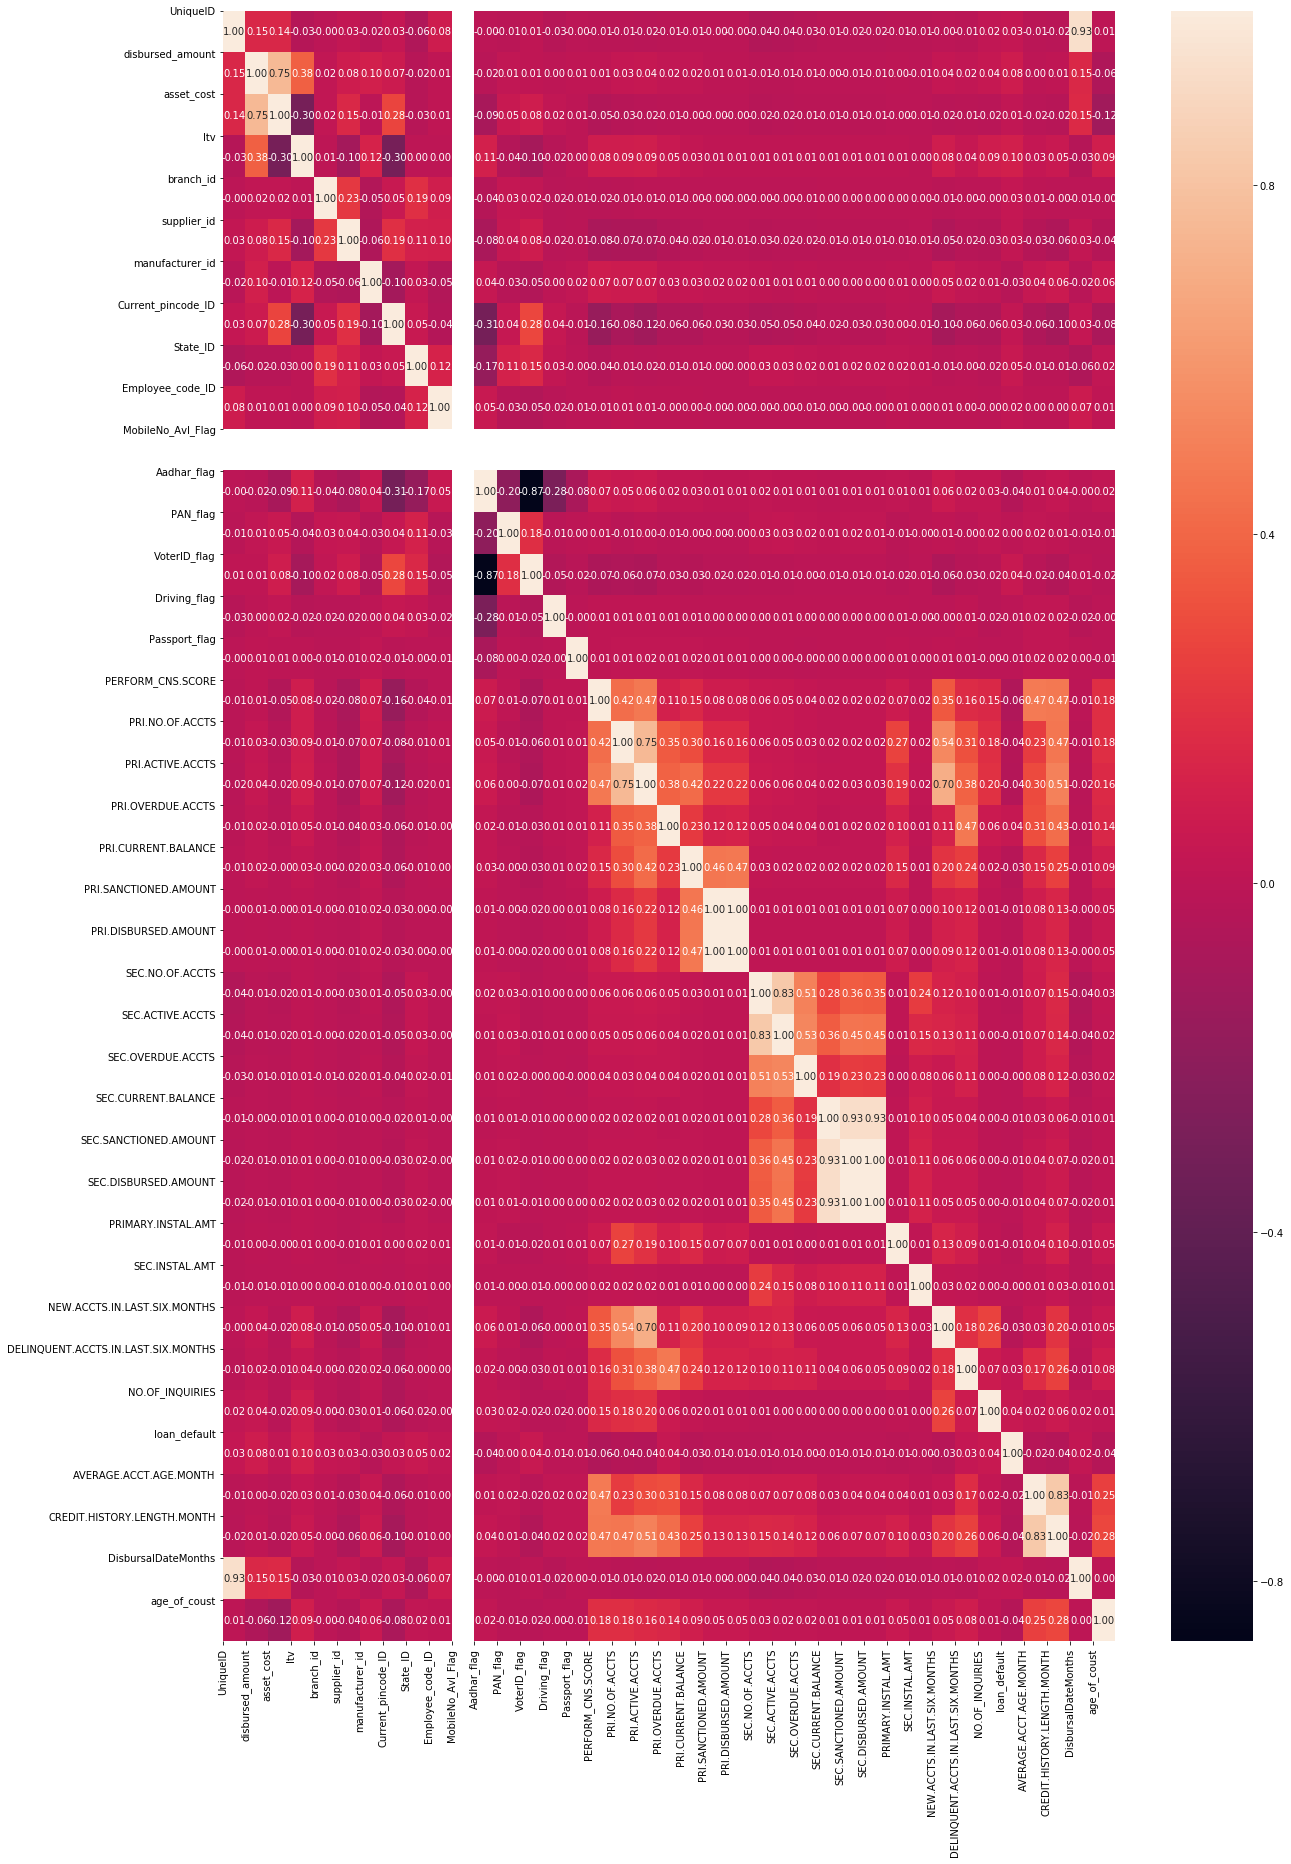

In [12]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(20, 30))
sns.heatmap(corr, annot=True, fmt=".2f")
#Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns)
#Apply yticks  
plt.yticks(range(len(corr.columns)), corr.columns)
#show plot
plt.show()

In [13]:
df1.columns

Index(['UniqueID', 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id',
       'supplier_id', 'manufacturer_id', 'Current_pincode_ID',
       'Employment.Type', 'State_ID', 'Employee_code_ID', 'Aadhar_flag',
       'PAN_flag', 'VoterID_flag', 'Driving_flag', 'Passport_flag',
       'PERFORM_CNS.SCORE', 'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS',
       'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT',
       'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS',
       'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT',
       'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'NO.OF_INQUIRIES', 'loan_default', 'AVERAGE.ACCT.AGE.MONTH',
       'CREDIT.HISTORY.LENGTH.MONTH', 'DisbursalDateMonths', 'age_of_coust'],
      dtype='object')

SEC.CURRENT.BALANCE and SEC.SANCTIONED.AMOUNT are co-related
PRI.DISBURSED.AMOUNT and PRI.SANCTIONED.AMOUNT

SEC.CURRENT.BALANCE and SEC.DISBURSED.AMOUNT are co-related
SEC.ACTIVE.ACCTS and SEC.NO.OF.ACCTS are co-related

In [14]:
df1=df1.drop("VoterID_flag",axis=1)

df1=df1.drop("SEC.SANCTIONED.AMOUNT",axis=1)
df1=df1.drop("SEC.DISBURSED.AMOUNT",axis=1)
df1=df1.drop("SEC.ACTIVE.ACCTS",axis=1)
df1=df1.drop("PRI.DISBURSED.AMOUNT",axis=1)


In [15]:
#df1=df1.drop("asset_cost",axis=1)
df1=df1.drop("PRI.ACTIVE.ACCTS",axis=1)
df1=df1.drop("AVERAGE.ACCT.AGE.MONTH",axis=1)




In [16]:
df1=df1.drop("NEW.ACCTS.IN.LAST.SIX.MONTHS",axis=1)


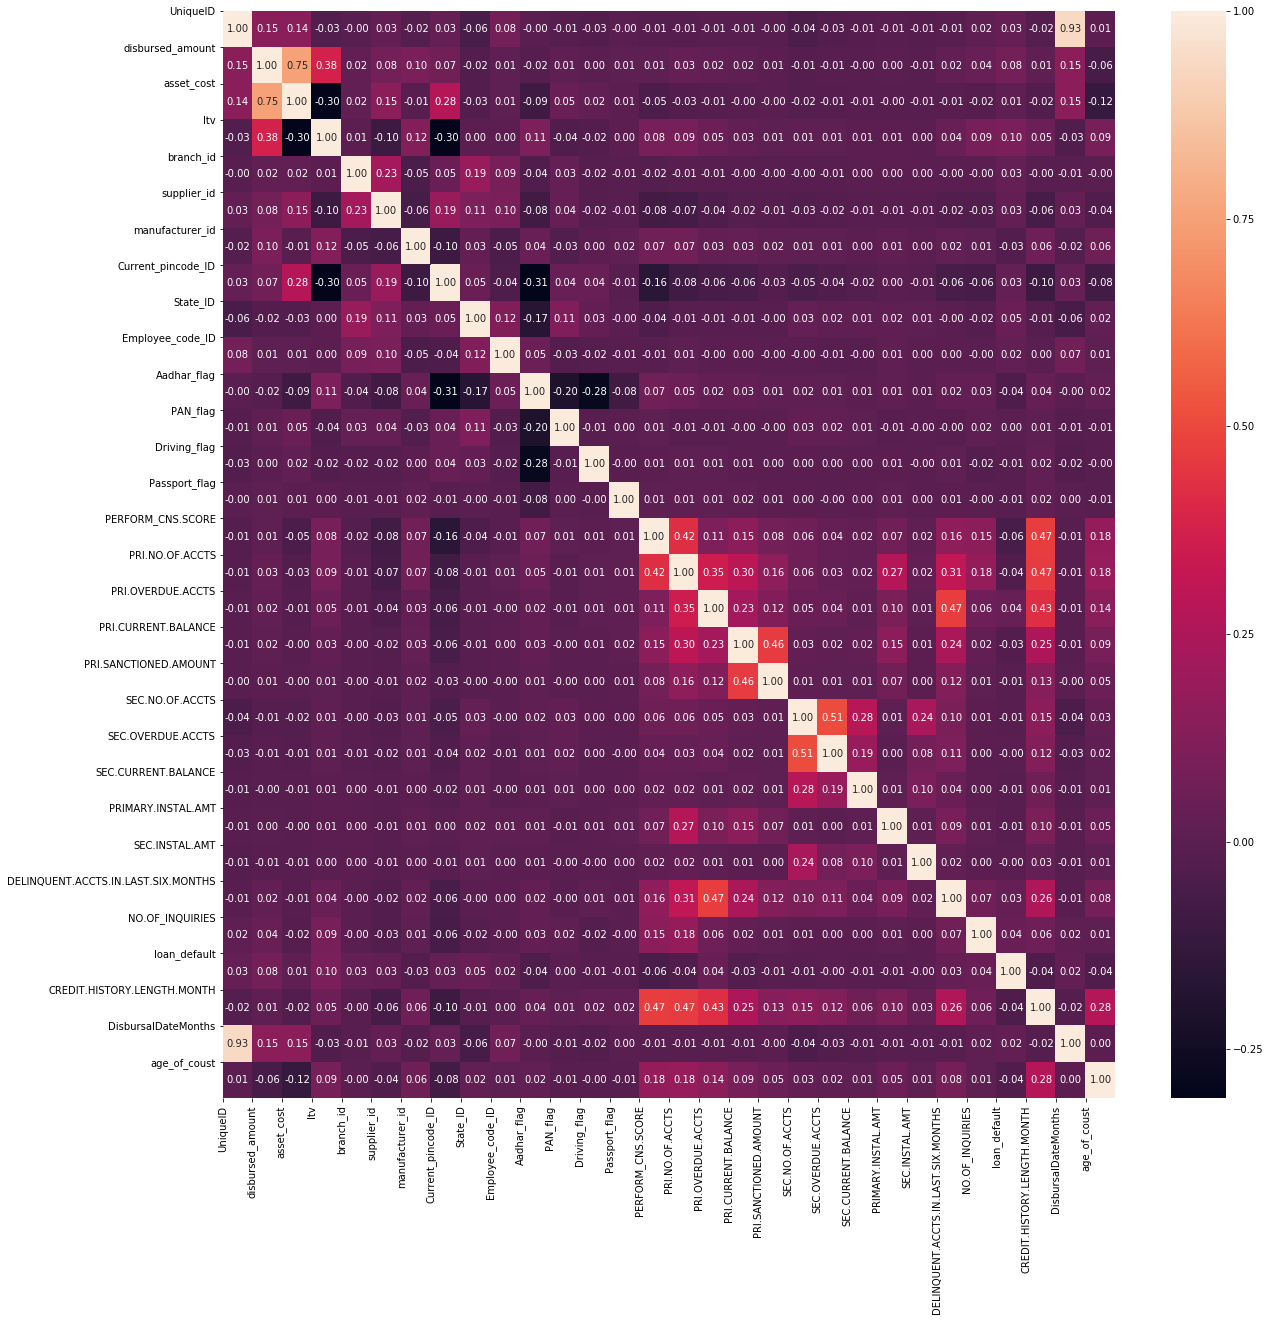

In [17]:
corr = df1.corr()
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corr, annot=True, fmt=".2f")
#Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns)
#Apply yticks  
plt.yticks(range(len(corr.columns)), corr.columns)
#show plot
plt.show()

<h1>Analysis

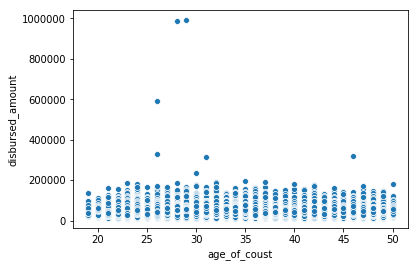

In [17]:
sns.scatterplot(x="age_of_coust", y="disbursed_amount", data=df)

<h3>Employment Type

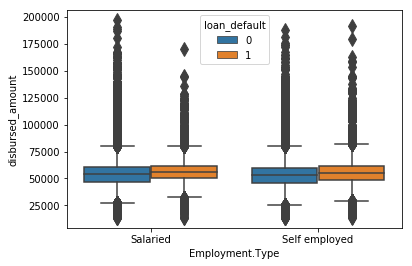

In [18]:
xy=df[df["disbursed_amount"]<=200000]
sns.boxplot(x="Employment.Type", y="disbursed_amount", hue="loan_default", data=xy,fliersize=10)

In [19]:
xy=df[df["disbursed_amount"]<=20000]
xy.head(100)

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default,AVERAGE.ACCT.AGE.MONTH,CREDIT.HISTORY.LENGTH.MONTH,DisbursalDateMonths,age_of_coust
435,461239,19574,60640,34.63,34,18680,45,1019,12-05-95,Self employed,...,0,0,0yrs 0mon,0yrs 0mon,0,0,0,0,8,24
813,497986,17850,97311,19.53,11,22976,51,5969,05-09-97,Salaried,...,0,0,0yrs 0mon,0yrs 0mon,0,0,0,0,9,22
823,487455,13990,80776,18.57,11,21475,45,5987,01-01-73,Self employed,...,0,0,4yrs 6mon,4yrs 6mon,0,0,54,54,9,46
844,446424,13990,80776,18.57,11,21475,45,5960,16-06-81,Self employed,...,0,0,0yrs 0mon,0yrs 0mon,0,0,0,0,8,38
943,540704,18619,66434,28.60,20,13931,45,6182,02-07-78,Self employed,...,0,0,0yrs 0mon,0yrs 0mon,0,0,0,0,9,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33558,457077,18370,92383,21.87,120,23452,48,6932,01-01-89,Self employed,...,0,0,0yrs 0mon,0yrs 0mon,0,0,0,0,8,30
33590,466320,15060,69259,23.82,120,20512,45,6930,01-01-87,Salaried,...,0,0,0yrs 0mon,0yrs 0mon,0,0,0,0,8,32
33659,455521,19840,98754,21.97,120,23452,48,6927,01-01-99,Salaried,...,0,0,1yrs 9mon,3yrs 0mon,0,0,21,36,8,20
34008,658629,19401,69318,29.29,67,22045,86,1434,01-06-91,Salaried,...,0,0,0yrs 0mon,0yrs 0mon,0,1,0,0,10,28


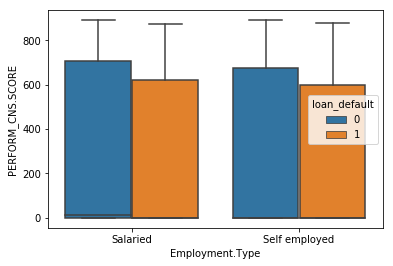

In [20]:
sns.boxplot(x="Employment.Type", y="PERFORM_CNS.SCORE", hue="loan_default", data=df)

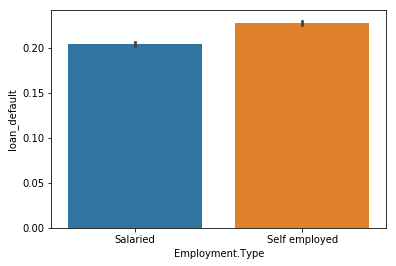

In [21]:
sns.barplot(x="Employment.Type", y="loan_default", data=df)

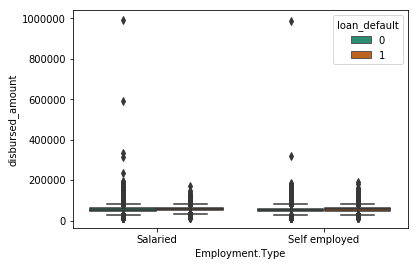

In [22]:
sns.boxplot(x="Employment.Type", y="disbursed_amount", hue="loan_default", palette="Dark2",data=df)

In [ ]:
sns.scatterplot(y="Employment.Type",x="State_ID", hue="loan_default", data=df)

In [ ]:
df['tenure_range']=pd.cut(df["PRI.NO.OF.ACCTS"],[0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75],right=True)
df['tenure_range'].value_counts().plot(kind='bar')
# sns.barplot(y="PRI.NO.OF.ACCTS", x="loan_default", data=df)

In [ ]:
sns.boxenplot(x="supplier_id", y="loan_default",data=df)

In [ ]:
df.groupby('disbursed_amount')['loan_default'].count().plot(kind='bar')

In [ ]:
df1.shape

<h2>Import

In [18]:
from sklearn.model_selection import train_test_split
from sklearn import metrics as sm
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression,LinearRegression,Ridge,Lasso
import scikitplot as skplt

from scikitplot.metrics import plot_roc_curve 

In [19]:
df1.dtypes

UniqueID                                 int64
disbursed_amount                         int64
asset_cost                               int64
ltv                                    float64
branch_id                                int64
supplier_id                              int64
manufacturer_id                          int64
Current_pincode_ID                       int64
Employment.Type                         object
State_ID                                 int64
Employee_code_ID                         int64
Aadhar_flag                              int64
PAN_flag                                 int64
Driving_flag                             int64
Passport_flag                            int64
PERFORM_CNS.SCORE                        int64
PRI.NO.OF.ACCTS                          int64
PRI.OVERDUE.ACCTS                        int64
PRI.CURRENT.BALANCE                      int64
PRI.SANCTIONED.AMOUNT                    int64
SEC.NO.OF.ACCTS                          int64
SEC.OVERDUE.A

<h3> converting every colums into number

In [21]:
credit_cat=df1.select_dtypes(include='object')
credit_num=df1.select_dtypes(include='number')

In [22]:
credit_cat=pd.get_dummies(credit_cat)x
credit_train_x=pd.concat([credit_cat,credit_num],axis=1)


In [23]:
y=credit_train_x["loan_default"]
x=credit_train_x.drop("loan_default",axis=1)

<h3> Spliting data for Test and Train
    

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)
y_train.shape

(174865,)

<h3>Least Important Features

In [35]:
imp_features=logit_model.feature_importances_
cols=x_train.columns
important_features=[]
for feat_names in zip(cols,imp_features):
    important_features.append(feat_names)

#imp_vals=pd.series(imp_features,x.columns.values)
top_10_features=sorted(important_features, key=lambda x: x[1],reverse=True)[-10:]
plt.bar(*zip(*top_10_features))
plt.xticks(rotation=90)
plt.show()

AttributeError: 'LogisticRegression' object has no attribute 'feature_importances_'

In [ ]:
imp_features=clf.feature_importances_
cols=x_train.columns
important_features=[]
for feat_names in zip(cols,imp_features):
    important_features.append(feat_names)

#imp_vals=pd.series(imp_features,x.columns.values)
top_10_features=sorted(important_features, key=lambda x: x[1],reverse=True)[:10]
plt.bar(*zip(*top_10_features))
plt.xticks(rotation=90)
plt.show()

In [ ]:
x=x.drop("Passport_flag",axis=1)
x=x.drop("SEC.OVERDUE.ACCTS",axis=1)
x=x.drop("SEC.INSTAL.AMT",axis=1)
x=x.drop("SEC.CURRENT.BALANCE",axis=1)
x=x.drop("SEC.NO.OF.ACCTS",axis=1)
x=x.drop("Driving_flag",axis=1)
x=x.drop("PRI.OVERDUE.ACCTS",axis=1)

In [88]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)
x_train.shape

(174865, 31)

In [ ]:
imp_features=clf.feature_importances_
cols=x_train.columns
important_features=[]
for feat_names in zip(cols,imp_features):
    important_features.append(feat_names)

#imp_vals=pd.series(imp_features,x.columns.values)
top_10_features=sorted(important_features, key=lambda x: x[1],reverse=True)[-15:]
plt.bar(*zip(*top_10_features))
plt.xticks(rotation=90)
plt.show()

<h2>Normalization

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

<h1>LogisticRegression

In [25]:
logit_model=LogisticRegression(class_weight="balanced",C=20000).fit(x_train,y_train)
logit_predictions=logit_model.predict(x_test)
train=logit_model.predict(x_train)

/Users/ankit.chaubey/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [26]:
print("Logistic Regression test Accuracy:",sm.accuracy_score(y_test,logit_predictions)*100)

Logistic Regression test Accuracy: 57.52543361526189


In [27]:
print("Logistic Regression train Accuracy:",sm.accuracy_score(y_train,train)*100)

Logistic Regression train Accuracy: 57.338518285534555


In [28]:
sm.confusion_matrix(y_test,logit_predictions)

array([[25499, 20059],
       [ 4699,  8032]])

In [29]:
report=sm.classification_report(y_test,logit_predictions)
print(report)

              precision    recall  f1-score   support

           0       0.84      0.56      0.67     45558
           1       0.29      0.63      0.39     12731

    accuracy                           0.58     58289
   macro avg       0.57      0.60      0.53     58289
weighted avg       0.72      0.58      0.61     58289



/Users/ankit.chaubey/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


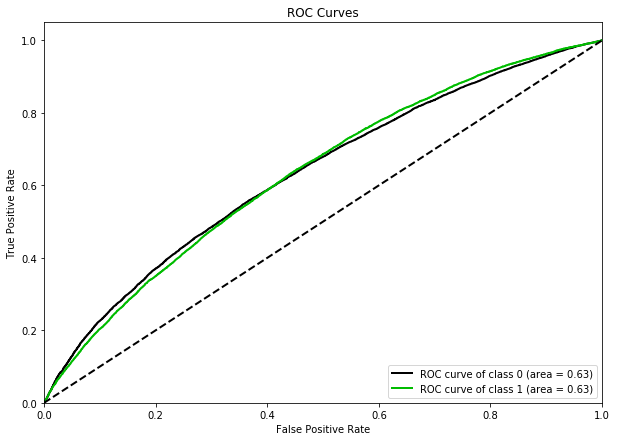

In [30]:
y_pred_probs = logit_model.predict_proba(x_test)
plot_roc_curve(y_test, y_pred_probs, curves=['each_class'], figsize=(10,7))
plt.show()

<h1> RandomForestClassifier

In [18]:
from sklearn.model_selection import train_test_split
from sklearn import metrics as sm
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import  cross_val_score,GridSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB


In [25]:
clf = RandomForestClassifier(n_estimators=1000,random_state=5, n_jobs=-1, class_weight="balanced",oob_score=True)
clf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=1000, n_jobs=-1, oob_score=True,
                       random_state=5, verbose=0, warm_start=False)

In [26]:
rf_predictions=clf.predict(x_test)
print("Random Forest Accuracy:",sm.accuracy_score(y_test,rf_predictions)*100)

Random Forest Accuracy: 77.8791881830191


In [27]:
rf_train=clf.predict(x_train)
print("Random Forest Accuracy:",sm.accuracy_score(y_train,rf_train)*100)

Random Forest Accuracy: 100.0


In [28]:
sm.confusion_matrix(y_test,rf_predictions)

array([[45070,   365],
       [12529,   325]])

In [29]:
report=sm.classification_report(y_test,rf_predictions)
print(report)

              precision    recall  f1-score   support

           0       0.78      0.99      0.87     45435
           1       0.47      0.03      0.05     12854

    accuracy                           0.78     58289
   macro avg       0.63      0.51      0.46     58289
weighted avg       0.71      0.78      0.69     58289



<h3>Least Important Features

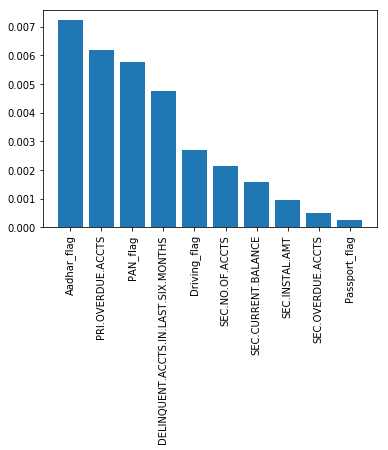

In [30]:
imp_features=clf.feature_importances_
cols=x.columns
important_features=[]
for feat_names in zip(cols,imp_features):
    important_features.append(feat_names)

#imp_vals=pd.series(imp_features,x.columns.values)
top_10_features=sorted(important_features, key=lambda x: x[1],reverse=True)[-10:]
plt.bar(*zip(*top_10_features))
plt.xticks(rotation=90)
plt.show()

In [31]:
x=x.drop("Passport_flag",axis=1)
x=x.drop("SEC.OVERDUE.ACCTS",axis=1)
x=x.drop("SEC.INSTAL.AMT",axis=1)
x=x.drop("SEC.CURRENT.BALANCE",axis=1)
x=x.drop("SEC.NO.OF.ACCTS",axis=1)
x=x.drop("Driving_flag",axis=1)
x=x.drop("PRI.OVERDUE.ACCTS",axis=1)
x=x.drop("Aadhar_flag",axis=1)

In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)
x_train.shape

(174865, 23)

In [33]:
clf = RandomForestClassifier(n_estimators=1000,random_state=5, n_jobs=-1, class_weight="balanced",oob_score=True)
clf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=1000, n_jobs=-1, oob_score=True,
                       random_state=5, verbose=0, warm_start=False)

In [43]:
rf_train=clf.predict(x_train)
print("Random Forest Accuracy:",sm.accuracy_score(y_train,rf_train)*100)

Random Forest Accuracy: 100.0


In [44]:
rf_predictions=clf.predict(x_test)
print("Random Forest Accuracy:",sm.accuracy_score(y_test,rf_predictions)*100)

Random Forest Accuracy: 78.22059050592736


In [45]:
sm.confusion_matrix(y_test,rf_predictions)

array([[45268,   415],
       [12280,   326]])

<h3> Top 20 Important Features

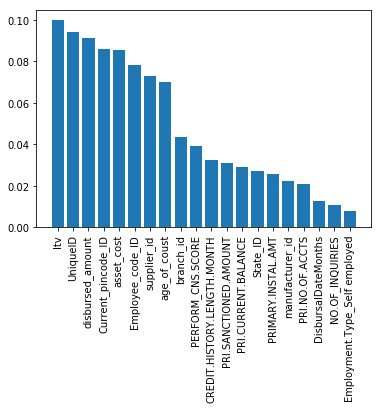

In [34]:
imp_features=clf.feature_importances_
cols=x_train.columns
important_features=[]
for feat_names in zip(cols,imp_features):
    important_features.append(feat_names)

#imp_vals=pd.series(imp_features,x.columns.values)
top_10_features=sorted(important_features, key=lambda x: x[1],reverse=True)[:20]
plt.bar(*zip(*top_10_features))
plt.xticks(rotation=90)
plt.show()

In [47]:
x.columns


Index(['Employment.Type_Salaried', 'Employment.Type_Self employed', 'UniqueID',
       'disbursed_amount', 'asset_cost', 'ltv', 'branch_id', 'supplier_id',
       'manufacturer_id', 'Current_pincode_ID', 'State_ID', 'Employee_code_ID',
       'PAN_flag', 'PERFORM_CNS.SCORE', 'PRI.NO.OF.ACCTS',
       'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT', 'PRIMARY.INSTAL.AMT',
       'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS', 'NO.OF_INQUIRIES',
       'CREDIT.HISTORY.LENGTH.MONTH', 'DisbursalDateMonths', 'age_of_coust'],
      dtype='object')

In [48]:
top10=x.drop("UniqueID",axis=1)
top10=top10.drop("PAN_flag",axis=1)
top10=top10.drop("DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS",axis=1)

In [49]:
x_train,x_test,y_train,y_test=train_test_split(top10,y,test_size=0.25)
x_train.shape

(174865, 20)

In [50]:
clf = RandomForestClassifier(n_estimators=500,random_state=100, n_jobs=-1, class_weight="",oob_score=True)
clf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=500, n_jobs=-1, oob_score=True,
                       random_state=100, verbose=0, warm_start=False)

In [51]:
rf_predictions=clf.predict(x_test)
print("Random Forest Accuracy:",sm.accuracy_score(y_test,rf_predictions)*100)

Random Forest Accuracy: 78.09706805743794


In [52]:
sm.confusion_matrix(y_test,rf_predictions)

array([[45110,   624],
       [12143,   412]])

In [155]:
params = {'max_depth': range(1,10,2),
          'max_features': ['auto', 'sqrt','log2'],
          'n_estimators': [200, 400, 600, 800, 1000, 1200],
          'min_samples_leaf': [1, 2, 4],
          'min_samples_split': [2, 5, 10]
          'cv': 
         }

Grid_randomF = GridSearchCV(RandomForestClassifier(random_state=15), params)

Grid_randomF.fit(x_train, y_train)

print(Grid_randomF.best_params_)

/Users/ankit.chaubey/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


KeyboardInterrupt: 

In [ ]:
clf_score = cross_val_score(clf, x_train, y_train, cv=10)
print(clf_score)
clf_score.mean()

<h3>DecisionTreeClassifier

In [35]:
from sklearn.tree import DecisionTreeClassifier
from scikitplot.metrics import plot_roc_curve

In [36]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=35)

In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [45]:
decisionTree_model=DecisionTreeClassifier(criterion='entropy',class_weight="balanced").fit(x_train,y_train)
train_predictions=decisionTree_model.predict(x_train)
test_predictions=decisionTree_model.predict(x_test)

In [46]:
print("Decision Tree Train Accuracy:",sm.accuracy_score(y_train,train_predictions))
print("Decision Tree Test Accuracy:",sm.accuracy_score(y_test,test_predictions))

Decision Tree Train Accuracy: 1.0
Decision Tree Test Accuracy: 0.6810061975938754


In [47]:
sm.confusion_matrix(y_test,test_predictions)

array([[29104,  7543],
       [ 7332,  2652]])

In [59]:
print(sm.classification_report(y_test,test_predictions))

              precision    recall  f1-score   support

           0       0.80      0.78      0.79     36647
           1       0.26      0.29      0.27      9984

    accuracy                           0.67     46631
   macro avg       0.53      0.53      0.53     46631
weighted avg       0.68      0.67      0.68     46631



<h3>KNeighborsClassifier

In [60]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

In [61]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [62]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=6)
classifier.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [63]:
y_pred = classifier.predict(x_test)
train_pred = classifier.predict(x_train)

In [64]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))

print("Train Accuracy:",accuracy_score(y_train, train_pred)*100)
print("Test Accuracy:",accuracy_score(y_test, y_pred)*100)

[[35279  1190]
 [ 9526   636]]
              precision    recall  f1-score   support

           0       0.79      0.97      0.87     36469
           1       0.35      0.06      0.11     10162

    accuracy                           0.77     46631
   macro avg       0.57      0.51      0.49     46631
weighted avg       0.69      0.77      0.70     46631

Train Accuracy: 79.89738530905036
Test Accuracy: 77.01957924985524


In [43]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=4,p=5)
classifier.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=5,
                     weights='uniform')

In [44]:
y_pred = classifier.predict(x_test)
train_pred = classifier.predict(x_train)

KeyboardInterrupt: 

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))

print("Train Accuracy:",accuracy_score(y_train, train_pred)*100)
print("Test Accuracy:",accuracy_score(y_test, y_pred)*100)

<h1>SVC


In [25]:
from sklearn.svm import LinearSVC


In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [28]:
svc = LinearSVC(C=0.10)

model = svc.fit(x_train, y_train)

/Users/ankit.chaubey/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [30]:
test_predictions=svc.predict(x_test)
train_predictions=svc.predict(x_train)

In [31]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test, test_predictions))

print(classification_report(y_test, test_predictions))

print("Train Accuracy:",accuracy_score(y_train, train_predictions)*100)
print("Test Accuracy:",accuracy_score(y_test, test_predictions)*100)

[[36569    34]
 [10010    18]]
              precision    recall  f1-score   support

           0       0.79      1.00      0.88     36603
           1       0.35      0.00      0.00     10028

    accuracy                           0.78     46631
   macro avg       0.57      0.50      0.44     46631
weighted avg       0.69      0.78      0.69     46631

Train Accuracy: 78.21716356695957
Test Accuracy: 78.46068066307821


In [32]:
from sklearn.svm import SVC

In [ ]:
linear_svm = SVC(kernel='linear', C=1,gamma=0.01, random_state=0)
# Train the classifier
linear_svm.fit(x_train, y_train)

test_predictions=linear_svm.predict(x_test)
train_predictions=linear_svm.predict(x_train)

print(confusion_matrix(y_test, test_predictions))

print(classification_report(y_test, test_predictions))



print("Train Accuracy:",accuracy_score(y_train, train_predictions)*100)
print("Test Accuracy:",accuracy_score(y_test, test_predictions)*100)

In [ ]:
linear_svm = SVC(kernel='rbf', C=1,gamma=0.01, random_state=0)
# Train the classifier
linear_svm.fit(X_train, y_train)

test_predictions=linear_svm.predict(X_test)
train_predictions=linear_svm.predict(X_train)

print(confusion_matrix(y_test, test_predictions))

print(classification_report(y_test, test_predictions))

print("Train Accuracy:",accuracy_score(y_train, train_predictions)*100)
print("Test Accuracy:",accuracy_score(y_test, test_predictions)*100)

In [ ]:
linear_svm = SVC(kernel='poly', C=10,gamma=0.2, random_state=0)
# Train the classifier
linear_svm.fit(X_train, y_train)

test_predictions=linear_svm.predict(X_test)
train_predictions=linear_svm.predict(X_train)

print(confusion_matrix(y_test, test_predictions))

print(classification_report(y_test, test_predictions))

print("Train Accuracy:",accuracy_score(y_train, train_predictions)*100)
print("Test Accuracy:",accuracy_score(y_test, test_predictions)*100)